In [1]:
import os
import textract
import PyPDF2
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_folder_path = '/Users/aringuyen/Desktop/CAP/10k-Reports/'
file_path = 'Starbuck-10k.pdf'
full_file_path = os.path.join(data_folder_path, file_path)

# extract text from pdf
text = textract.process(full_file_path, method='pdfminer').decode('utf-8')

# lower case
text = text.lower()

In [3]:
# Remove punctuation
tokenizer = RegexpTokenizer(r"\w+")
text_tokens = tokenizer.tokenize(text)

In [4]:
# remove stop words
stopwords = set(stopwords.words('english'))
text_tokens_no_stopwords = [word for word in text_tokens if word not in stopwords]

In [5]:
text_tokens_no_stopwords

['table',
 'contents',
 'united',
 'states',
 'securities',
 'exchange',
 'commission',
 'annual',
 'report',
 'pursuant',
 'section',
 '13',
 '15',
 'securities',
 'exchange',
 'act',
 '1934',
 'transition',
 'report',
 'pursuant',
 'section',
 '13',
 '15',
 'securities',
 'exchange',
 'act',
 '1934',
 'washington',
 'dc',
 '20549',
 'form',
 '10',
 'k',
 'fiscal',
 'year',
 'ended',
 'september',
 '27',
 '2020',
 'transition',
 'period',
 'commission',
 'file',
 'number',
 '0',
 '20322',
 'starbucks',
 'corporation',
 'exact',
 'name',
 'registrant',
 'specified',
 'charter',
 'washington',
 'state',
 'incorporation',
 '91',
 '1325671',
 'irs',
 'employer',
 'id',
 '2401',
 'utah',
 'avenue',
 'south',
 'seattle',
 'washington',
 '98134',
 '206',
 '447',
 '1575',
 'address',
 'principal',
 'executive',
 'office',
 'zip',
 'code',
 'telephone',
 'number',
 'securities',
 'registered',
 'pursuant',
 'section',
 '12',
 'b',
 'act',
 'title',
 'class',
 'common',
 'stock',
 '0',
 '001',


In [6]:
wordcloud = WordCloud(stopwords=stopwords, background_color="skyblue").generate(text)

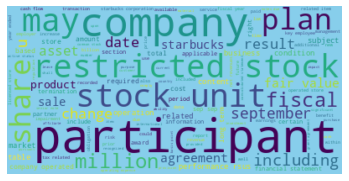

In [7]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [8]:
# stemming
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in text_tokens_no_stopwords]

In [9]:
stemmed

['tabl',
 'content',
 'unit',
 'state',
 'secur',
 'exchang',
 'commiss',
 'annual',
 'report',
 'pursuant',
 'section',
 '13',
 '15',
 'secur',
 'exchang',
 'act',
 '1934',
 'transit',
 'report',
 'pursuant',
 'section',
 '13',
 '15',
 'secur',
 'exchang',
 'act',
 '1934',
 'washington',
 'dc',
 '20549',
 'form',
 '10',
 'k',
 'fiscal',
 'year',
 'end',
 'septemb',
 '27',
 '2020',
 'transit',
 'period',
 'commiss',
 'file',
 'number',
 '0',
 '20322',
 'starbuck',
 'corpor',
 'exact',
 'name',
 'registr',
 'specifi',
 'charter',
 'washington',
 'state',
 'incorpor',
 '91',
 '1325671',
 'ir',
 'employ',
 'id',
 '2401',
 'utah',
 'avenu',
 'south',
 'seattl',
 'washington',
 '98134',
 '206',
 '447',
 '1575',
 'address',
 'princip',
 'execut',
 'offic',
 'zip',
 'code',
 'telephon',
 'number',
 'secur',
 'regist',
 'pursuant',
 'section',
 '12',
 'b',
 'act',
 'titl',
 'class',
 'common',
 'stock',
 '0',
 '001',
 'par',
 'valu',
 'per',
 'share',
 'trade',
 'symbol',
 'sbux',
 'name',
 'e